## AMR in genomes from mysterious city
First lets upload the mysterious city AMR presence-absence table
We have 143 genomes (rows) with 505 AMR markers detected

In [ ]:
import pandas as pd
## 505 combined CARD-manual Ids from mysterious samples   ### This table is incorrect, more ones are required by roow
url = 'https://raw.githubusercontent.com/ccm-bioinfo/cambda2023/main/06_amr_resistance/data/amr_mistery_table20230622_aroIds.tsv'
# Read the TSV file into a DataFrame
df_CM_mysterious = pd.read_csv(url, delimiter='\t')
# Rename the first column
df_CM_mysterious.columns.values[0] = 'ID'

# Print the DataFrame
print(df_CM_mysterious.head())

# Get the dimensions of the DataFrame
rows_df_CM_mysterious, columns_df_CM_mysterious = df_CM_mysterious.shape

# Print the dimensions
print("Number of rows:", rows_df_CM_mysterious)
print("Number of columns:", columns_df_CM_mysterious)
# Count non-zero values by row
non_zero_counts = (df_CM_mysterious != 0).sum(axis=1)

# Print the result
print(non_zero_counts)
#print (df)


   ID  ARO:3000167  ARO:3002847  mrkb  enta  fepa  ARO:3004122  cyca  csge  \
0  S1            0            0     0     0     0            0     1     0   
1  S2            0            0     0     0     0            0     1     0   
2  S3            0            0     0     0     0            0     1     0   
3  S4            0            0     0     1     0            0     1     0   
4  S5            0            0     0     0     0            0     1     0   

   iucc  ...  teml100  scintssj  wcst  sfax  kpsd  mdlb  ARO:3001084  tssj  \
0     0  ...        0         0     0     0     0     0            0     0   
1     0  ...        0         0     0     0     0     0            0     0   
2     0  ...        0         0     0     0     0     0            0     0   
3     0  ...        0         0     0     0     0     0            0     0   
4     0  ...        0         0     0     0     0     0            0     0   

   icmftssm  acrr  
0         0     0  
1         0     0  
2 

In [ ]:
## Adding metadata from such as species to mysterious samples
url = 'https://raw.githubusercontent.com/ccm-bioinfo/cambda2023/main/06_amr_resistance/codigos/data_preparation/data/amr_patterns.tsv'  # Replace with the actual GitHub URL of the CSV file

# Read the TSV file into a DataFrame
df_metadata_mysterious = pd.read_csv(url, delimiter='\t')
new_column = df_metadata_mysterious['ID']
df_metadata_mysterious.insert(2, 'City', new_column)
df_metadata_mysterious['City'] = 'mysterious'
df_metadata_mysterious=df_metadata_mysterious.iloc[:, :4]

# Print the DataFrame
#print(df_metadata_mysterious.head())
# Perform the join based on the 'Id' column
mysterious_df = pd.merge( df_metadata_mysterious,df_CM_mysterious, on='ID')

# Print the merged DataFrame
print(mysterious_df.head())



   ID                  Species        City AST-based group  ARO:3000167  \
0  S1  Enterobacter hormaechei  mysterious   3GC-resistant            0   
1  S2  Enterobacter hormaechei  mysterious          CP CRE            0   
2  S3  Enterobacter hormaechei  mysterious          CP CRE            0   
3  S4  Enterobacter hormaechei  mysterious          CP CRE            0   
4  S5  Enterobacter hormaechei  mysterious          CP CRE            0   

   ARO:3002847  mrkb  enta  fepa  ARO:3004122  ...  teml100  scintssj  wcst  \
0            0     0     0     0            0  ...        0         0     0   
1            0     0     0     0            0  ...        0         0     0   
2            0     0     0     0            0  ...        0         0     0   
3            0     0     1     0            0  ...        0         0     0   
4            0     0     0     0            0  ...        0         0     0   

   sfax  kpsd  mdlb  ARO:3001084  tssj  icmftssm  acrr  
0     0     0    

In [ ]:
# Getting consensus by city
## Pending

# Extract column 3

#df=mysterious_df
#df = df.drop(columns=[df.columns[0], df.columns[2], df.columns[3]])

#grouped = df.groupby('Species').agg(lambda x: x.mode().iloc[0])

# Print the result
#print(grouped)
# Count non-zero values by row
#non_zero_counts = (df != 0).sum(axis=1)

# Print the result
#print(non_zero_counts)
#print (df)

## AMR in metagenomes  
### Extracted by taxonomy - Binned by city - Assembled - AMR profiled
We found 492 CARD Ids ( columns) not all of them are in the mysterious city samples.  
The 12 rows are the genus _Escherichia_, _Enterobacter_ and _Klebsiella_ in the 6 US cities were AMR CARD models were found.


In [ ]:

## CARD table for Extracted by Taxonomy , binned by city
url = 'https://raw.githubusercontent.com/ccm-bioinfo/cambda2023/main/06_amr_resistance/data/extraction-card-presence-anton-20230621.tsv'  # Replace with the actual GitHub URL of the CSV file

# Read the TSV file into a DataFrame
df_ET_BC_AMR_CARD = pd.read_csv(url, delimiter='\t').transpose()

# Get the values from the third row
third_row = df_ET_BC_AMR_CARD.iloc[1]
df_ET_BC_AMR_CARD.columns=third_row
# Add a prefix to column names
prefix = 'ARO:'  # Replace with the desired prefix
df_ET_BC_AMR_CARD = df_ET_BC_AMR_CARD.add_prefix(prefix)

# Remove a specific row by index
index_to_remove = 'aro'  # Replace with the index of the row you want to remove
df_ET_BC_AMR_CARD = df_ET_BC_AMR_CARD.drop(index_to_remove)


print(df_ET_BC_AMR_CARD)


aro        ARO:3000620 ARO:3000535 ARO:3003548  \
Unnamed: 0        adeL        macB        mdtN   
BAL_En               1           1           1   
DEN_En               0           1           1   
DEN_Es               0           0           0   
DEN_Kl               0           0           0   
MIN_En               1           0           0   
NYC_En               1           1           1   
NYC_Es               1           1           0   
NYC_Kl               1           1           1   
SAC_En               1           0           0   
SAN_En               0           0           0   

aro                                               ARO:3003511 ARO:3003980  \
Unnamed: 0  Escherichia coli soxS with mutation conferring...    tetA(58)   
BAL_En                                                      1           1   
DEN_En                                                      0           1   
DEN_Es                                                      0           0   
DEN_Kl        

Now we will get the CARD Ids intersection with IDs in mysterious city samples, only 71 were found.  

In [ ]:


# Create an empty column with the desired name
new_column = df_ET_BC_AMR_CARD.index

# Get the intersection of column names
common_columns = list(set(df_CM_mysterious.columns).intersection(df_ET_BC_AMR_CARD.columns))

# Keep only the common columns in both DataFrames
#df1 = df_CM_mysterious[common_columns]
df_ET_BC_AMR_CARD = df_ET_BC_AMR_CARD[common_columns]

# Print the updated DataFrames with only the common columns
# Assign the empty column as the first column in the DataFrame
df_ET_BC_AMR_CARD.insert(0, 'db', new_column)
df_ET_BC_AMR_CARD=df_ET_BC_AMR_CARD.reset_index(drop=True)

print(df_ET_BC_AMR_CARD)


# Print the DataFrame
#print(df_ET_BC_AMR_CARD)



aro          db                   ARO:3004122 ARO:3000794 ARO:3005059  \
0    Unnamed: 0  Klebsiella pneumoniae OmpK37        mdtC        LptD   
1        BAL_En                             0           1           0   
2        DEN_En                             0           0           0   
3        DEN_Es                             0           0           0   
4        DEN_Kl                             0           0           0   
5        MIN_En                             0           0           0   
6        NYC_En                             1           1           1   
7        NYC_Es                             1           1           0   
8        NYC_Kl                             1           1           1   
9        SAC_En                             0           1           0   
10       SAN_En                             0           0           0   

aro ARO:3003922 ARO:3002858 ARO:3000216 ARO:3000833 ARO:3002660 ARO:3001329  \
0          oqxA      dfrA12        acrB     

Lets find all hits of the manually curated database 325 Ids were blastn against metagenomic samples



In [ ]:
url2='https://raw.githubusercontent.com/ccm-bioinfo/cambda2023/main/06_amr_resistance/data/amr_counts_complement_b3_20230629.tsv'
# this link is the result given by blast our 325 ids database vs cambda metagenomic samples


# Read the TSV file into a DataFrame
df_ET_BC_AMR_BLASTn = pd.read_csv(url2, delimiter='\t')
df_ET_BC_AMR_BLASTn['db'] = df_ET_BC_AMR_BLASTn['db'].str.split('.').str[0]

# Create an empty column with the desired name
new_column = df_ET_BC_AMR_BLASTn['db']

# Print the DataFrame
#print(df_ET_BC_AMR_BLASTn)

# Get the intersection of column names
common_columns = list(set(df_CM_mysterious.columns).intersection(df_ET_BC_AMR_BLASTn))

# Keep only the common columns in both DataFrames
#df1 = df_CM_mysterious[common_columns]
df_ET_BC_AMR_BLASTn= df_ET_BC_AMR_BLASTn[common_columns]
# Transform DataFrame to boolean
df_boolean = df_ET_BC_AMR_BLASTn.astype(bool)
# Convert boolean values back to numeric
df_ET_BC_AMR_BLASTn = df_boolean.astype(int)


# Assign the empty column as the first column in the DataFrame
df_ET_BC_AMR_BLASTn.insert(0, 'db', new_column)
df_ET_BC_AMR_BLASTn=df_ET_BC_AMR_BLASTn.reset_index(drop=True)

# Print the updated DataFrames with only the common columns
#print(df1)
print(df_ET_BC_AMR_BLASTn)

        db  wzc  iuta  yhei  chus  gspa  iucd  phoq  tesa  setb  ...  clbs  \
0   BAL_En    0     0     0     0     0     1     0     1     0  ...     0   
1   BAL_Es    0     0     0     0     0     0     0     0     0  ...     0   
2   BAL_Kl    0     0     0     0     0     0     0     0     0  ...     0   
3   DEN_En    0     0     0     0     0     0     0     0     0  ...     0   
4   DEN_Es    0     0     0     0     0     0     0     0     0  ...     0   
5   DEN_Kl    0     0     1     0     0     0     0     1     1  ...     0   
6   MIN_En    0     0     0     0     0     0     0     0     0  ...     0   
7   MIN_Kl    0     0     0     0     0     0     0     0     0  ...     0   
8   NYC_En    0     0     1     0     0     1     0     1     1  ...     0   
9   NYC_Es    0     0     1     0     0     0     0     1     0  ...     0   
10  NYC_Kl    0     1     0     0     0     0     0     1     1  ...     0   
11  SAC_En    0     0     0     0     0     0     0     0     0 

Now lets horizontally combined the two datasets, so that for each city we will have 71+325 =396 AMR IDS

In [ ]:
#print(df_ET_BC_AMR_BLASTn['db'])
#print(df_ET_BC_AMR_CARD['db'])
merged_ETBCMet_df = pd.merge(df_ET_BC_AMR_BLASTn, df_ET_BC_AMR_CARD, on='db')
merged_ETBCMet_df.rename(columns={'db': 'ID'}, inplace=True)
print(merged_ETBCMet_df)

       ID  wzc  iuta  yhei  chus  gspa  iucd  phoq  tesa  setb  ...  \
0  BAL_En    0     0     0     0     0     1     0     1     0  ...   
1  DEN_En    0     0     0     0     0     0     0     0     0  ...   
2  DEN_Es    0     0     0     0     0     0     0     0     0  ...   
3  DEN_Kl    0     0     1     0     0     0     0     1     1  ...   
4  MIN_En    0     0     0     0     0     0     0     0     0  ...   
5  NYC_En    0     0     1     0     0     1     0     1     1  ...   
6  NYC_Es    0     0     1     0     0     0     0     1     0  ...   
7  NYC_Kl    0     1     0     0     0     0     0     1     1  ...   
8  SAC_En    0     0     0     0     0     0     0     0     0  ...   
9  SAN_En    0     0     0     0     0     0     0     0     0  ...   

   ARO:3000796  ARO:3002895  ARO:3003838  ARO:3000533  ARO:3000502  \
0            0            0            0            0            1   
1            0            0            0            0            0   
2       

Now lets combine the 10 rows from metagenomics and ~300 AMR Ids with
~146 rows with ~505 AMR markers from mysterious city

In [ ]:
# Vertically join the DataFrames keeping all columns from df1
concatenated_df = pd.concat([df_CM_mysterious, merged_ETBCMet_df], axis=0, ignore_index=True).fillna(0)
print(concatenated_df)

         ID  ARO:3000167  ARO:3002847  mrkb  enta  fepa  ARO:3004122  cyca  \
0        S1          0.0          0.0     0     0     0            0     1   
1        S2          0.0          0.0     0     0     0            0     1   
2        S3          0.0          0.0     0     0     0            0     1   
3        S4          0.0          0.0     0     1     0            0     1   
4        S5          0.0          0.0     0     0     0            0     1   
..      ...          ...          ...   ...   ...   ...          ...   ...   
151  NYC_En          0.0          0.0     0     1     1            1     1   
152  NYC_Es          0.0          0.0     0     1     1            1     0   
153  NYC_Kl          0.0          0.0     1     1     1            1     1   
154  SAC_En          0.0          0.0     0     0     0            0     0   
155  SAN_En          0.0          0.0     0     0     0            0     0   

     csge  iucc  ...  teml100  scintssj  wcst  sfax  kpsd  mdlb

In [ ]:

## Metadata from mysterious samples
url = 'https://raw.githubusercontent.com/ccm-bioinfo/cambda2023/main/06_amr_resistance/codigos/data_preparation/data/amr_patterns.tsv'  # Replace with the actual GitHub URL of the CSV file

# Read the TSV file into a DataFrame
df_metadata_mysterious = pd.read_csv(url, delimiter='\t')
new_column = df_metadata_mysterious['ID']
df_metadata_mysterious.insert(2, 'City', new_column)
df_metadata_mysterious['City'] = 'mysterious'
df_metadata_mysterious=df_metadata_mysterious.iloc[:, :4]

# Print the DataFrame
#print(df_metadata_mysterious.head())

df=concatenated_df.tail(10)
new_column1 =concatenated_df.tail(10)['ID'].str.split('_').str[0]
new_column2 =concatenated_df.tail(10)['ID'].str.split('_').str[1].replace("En", "Enterobacter hormaechei").replace("Es", "Escherichia coli").replace("Kl", "Klebsiella pneumoniae")

df.insert(1, 'Species', new_column2)
df.insert(2, 'City', new_column1)

df=df.reset_index(drop=True)
df=df.iloc[:, :3]
#print(df)

metadata_df = pd.concat([df_metadata_mysterious, df], axis=0, ignore_index=True).fillna(0)
print(metadata_df)


         ID                  Species        City AST-based group
0        S1  Enterobacter hormaechei  mysterious   3GC-resistant
1        S2  Enterobacter hormaechei  mysterious          CP CRE
2        S3  Enterobacter hormaechei  mysterious          CP CRE
3        S4  Enterobacter hormaechei  mysterious          CP CRE
4        S5  Enterobacter hormaechei  mysterious          CP CRE
..      ...                      ...         ...             ...
151  NYC_En  Enterobacter hormaechei         NYC               0
152  NYC_Es         Escherichia coli         NYC               0
153  NYC_Kl    Klebsiella pneumoniae         NYC               0
154  SAC_En  Enterobacter hormaechei         SAC               0
155  SAN_En  Enterobacter hormaechei         SAN               0

[156 rows x 4 columns]


Now lets add the metadata of all cities (including misterious) to the presence Absence table

In [ ]:
merged_df = pd.merge(metadata_df, concatenated_df, on='ID')
print(merged_df)
#data = merged_df.iloc[:, 4:].values
#print(data)

         ID                  Species        City AST-based group  ARO:3000167  \
0        S1  Enterobacter hormaechei  mysterious   3GC-resistant          0.0   
1        S2  Enterobacter hormaechei  mysterious          CP CRE          0.0   
2        S3  Enterobacter hormaechei  mysterious          CP CRE          0.0   
3        S4  Enterobacter hormaechei  mysterious          CP CRE          0.0   
4        S5  Enterobacter hormaechei  mysterious          CP CRE          0.0   
..      ...                      ...         ...             ...          ...   
151  NYC_En  Enterobacter hormaechei         NYC               0          0.0   
152  NYC_Es         Escherichia coli         NYC               0          0.0   
153  NYC_Kl    Klebsiella pneumoniae         NYC               0          0.0   
154  SAC_En  Enterobacter hormaechei         SAC               0          0.0   
155  SAN_En  Enterobacter hormaechei         SAN               0          0.0   

     ARO:3002847  mrkb  ent

In [ ]:

# Assuming you have a DataFrame named df

# Export the DataFrame as a CSV file
csv_file_path = '230622_AMR_mysterious_ETBC_all_nelly.csv'
merged_df.to_csv(csv_file_path, index=False)

# Print the file paths
print("CSV file saved:", csv_file_path)

CSV file saved: 230622_AMR_mysterious_ETBC_all_nelly.csv


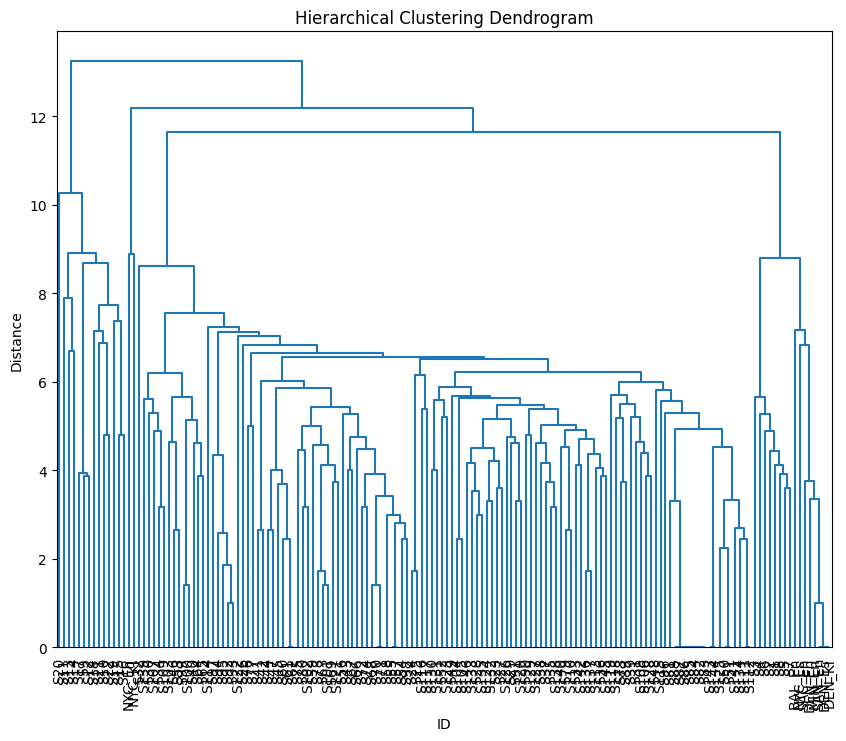

In [ ]:

import pandas as pd
import requests
from io import StringIO
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Define the URL
url = 'https://raw.githubusercontent.com/ccm-bioinfo/cambda2023/main/06_amr_resistance/data/230622_AMR_mysterious_ETBC_all_nelly.csv'

# Make a GET request to fetch the data from the URL
response = requests.get(url)

# Read the response content into a DataFrame
df = pd.read_csv(StringIO(response.text))

# Extract the columns for clustering and labeling
data = df.iloc[:, 5:].values
labels = df['ID'].values

# Perform hierarchical clustering
Z = linkage(data, method='average')

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(10, 8))
dendrogram(Z, labels=labels, color_threshold=0, leaf_font_size=10, ax=ax)

# Set plot title and labels
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('ID')
plt.ylabel('Distance')

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import requests
from io import StringIO
from sklearn.cluster import KMeans

# Define the URL
url = 'https://raw.githubusercontent.com/ccm-bioinfo/cambda2023/main/06_amr_resistance/data/230622_AMR_mysterious_ETBC_all_nelly.csv'

# Make a GET request to fetch the data from the URL
response = requests.get(url)

# Read the response content into a DataFrame
df = pd.read_csv(StringIO(response.text))

# Extract the columns for clustering
data = df.iloc[:, 5:].values

# Perform clustering
kmeans = KMeans(n_clusters=3)  # Set the desired number of clusters
clusters = kmeans.fit_predict(data)

# Add the clusters as a new column in the DataFrame
df['Cluster'] = clusters

# Print the DataFrame with the cluster assignment
print(df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         ID                  Species        City AST-based group  ARO:3000167  \
0        S1  Enterobacter hormaechei  mysterious   3GC-resistant          0.0   
1        S2  Enterobacter hormaechei  mysterious          CP CRE          0.0   
2        S3  Enterobacter hormaechei  mysterious          CP CRE          0.0   
3        S4  Enterobacter hormaechei  mysterious          CP CRE          0.0   
4        S5  Enterobacter hormaechei  mysterious          CP CRE          0.0   
..      ...                      ...         ...             ...          ...   
151  NYC_Kl    Klebsiella pneumoniae         NYC               0          0.0   
152  SAC_En  Enterobacter hormaechei         SAC               0          0.0   
153  DEN_Es         Escherichia coli         DEN               0          0.0   
154  DEN_Kl    Klebsiella pneumoniae         DEN               0          0.0   
155  SAN_En  Enterobacter hormaechei         SAN               0          0.0   

     ARO:3002847  mrkb  ent